In [59]:
import monetdb.sql,pandas as pd,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42

In [93]:
reg = pd.read_csv('../1.Data/US_Reg.csv')

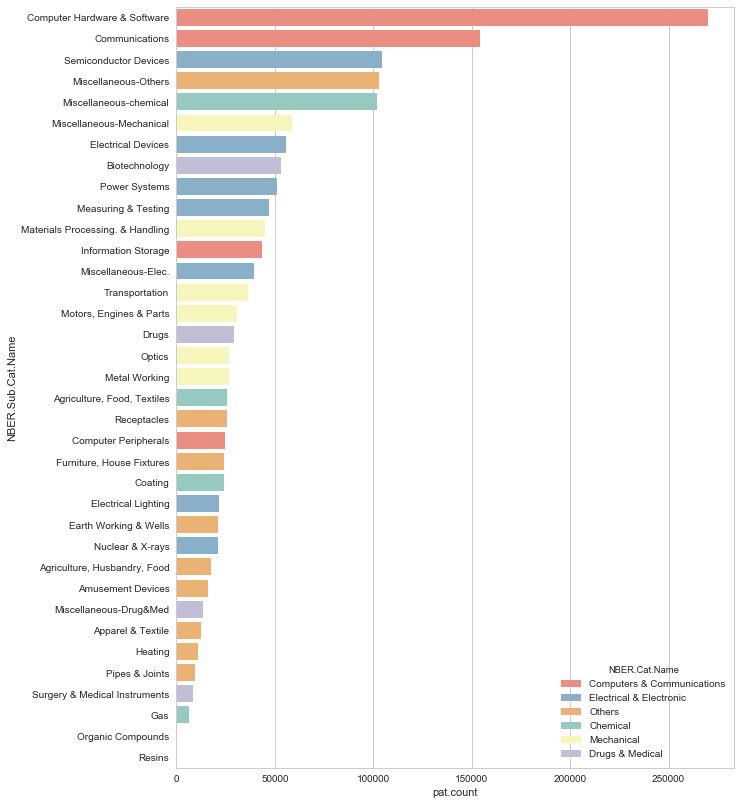

In [163]:
df = pd.read_csv('../1.Data/US_RegTechYr.csv')
df = df[df['dec']==2000].drop('dec',1)
df = df[df['CBSA'].isin(set(reg[reg['Flag.CBSA.availability']==1]['CBSA']))]
df = df.groupby('Class').sum()[['pat.count']].reset_index()
df = pd.merge(df,pd.read_csv('../1.Data/US_Tech.csv',encoding='utf-8')[['Class','NBER.Sub.Cat.Name','NBER.Cat.Name']].drop_duplicates())
df = df.groupby(['NBER.Sub.Cat.Name','NBER.Cat.Name']).sum()[['pat.count']].reset_index().sort_values(by='pat.count',ascending=False)

sns.set_style("whitegrid")

palette = sns.color_palette("Set3", len(set(df['NBER.Cat.Name'])))
palette_hex = palette.as_hex()
palette = palette[3:]+palette[:3]

plt.figure(figsize=(10,int(0.4*len(set(df['NBER.Sub.Cat.Name'])))))


sns_plot = sns.barplot(x="pat.count", y="NBER.Sub.Cat.Name", data=df,hue="NBER.Cat.Name",dodge=False,palette=palette)
# sns_plot.get_figure().savefig("../4.Results/SM/TechBar.pdf")

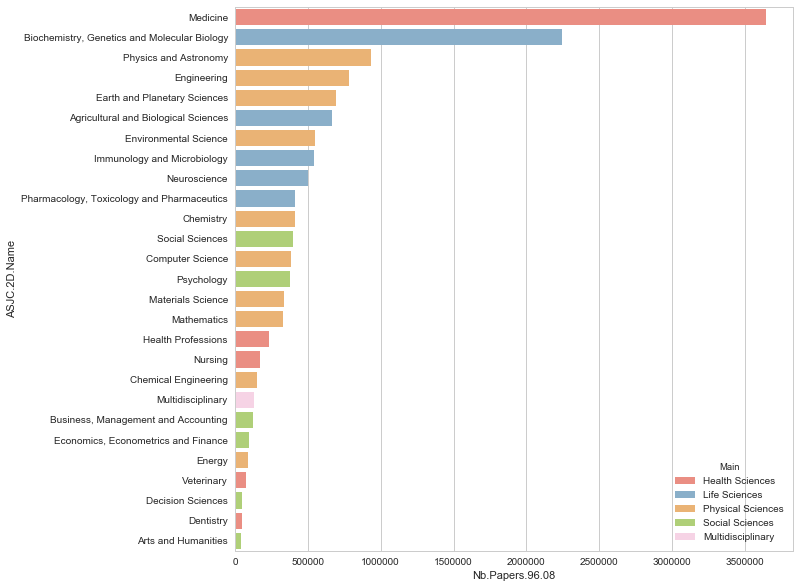

In [159]:
df = pd.read_csv('../1.Data/US_RegFieldYr.csv')
df = df[df['Year']==2010]
df = df[df['CBSA'].isin(set(reg[reg['Flag.CBSA.availability']==1]['CBSA']))]
df = df.groupby(['ASJC.4D']).sum()[['Nb.Papers.96.08']].reset_index()
df = pd.merge(df,pd.read_csv('../1.Data/US_Field.csv')[['ASJC.4D','ASJC.2D.Name','Main']].drop_duplicates())
df = df.groupby(['ASJC.2D.Name','Main']).sum()[['Nb.Papers.96.08']].reset_index().sort_values(by='Nb.Papers.96.08',ascending=False)

sns.set_style("whitegrid")

palette = sns.color_palette("Set3", len(set(df['ASJC.2D.Name'])))
palette_hex = palette.as_hex()
palette = palette[3:]+palette[:3]

plt.figure(figsize=(10,int(0.4*len(set(df['ASJC.2D.Name'])))))

sns_plot = sns.barplot(x="Nb.Papers.96.08", y="ASJC.2D.Name", data=df,hue="Main",dodge=False,palette=palette)
# sns_plot.get_figure().savefig("../4.Results/SM/FieldBar.pdf")

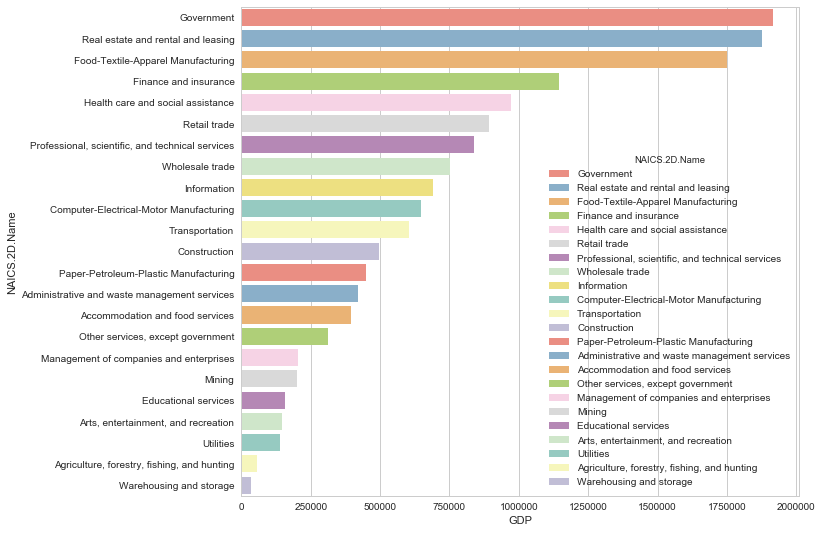

In [160]:
df = pd.read_csv('../1.Data/US_RegInd2DYr.csv')
df = df[df['CBSA'].isin(set(reg[reg['Flag.CBSA.availability']==1]['CBSA']))]
df = df[df['Year']==2015].groupby(['NAICS.2D']).sum()[['GDP']].reset_index()
df = pd.merge(df,pd.read_csv('../1.Data/US_Ind.csv',encoding='utf-8')[['NAICS.2D','NAICS.2D.Name']].drop_duplicates().dropna()).sort_values(by='GDP',ascending=False)
df['NAICS.2D.Name'] = df['NAICS.2D.Name'].str.strip()

sns.set_style("whitegrid")

palette = sns.color_palette("Set3", len(set(df['NAICS.2D.Name'])))
palette_hex = palette.as_hex()
palette = palette[3:]+palette[:3]

plt.figure(figsize=(10,int(0.4*len(set(df['NAICS.2D.Name'])))))

sns_plot = sns.barplot(x="GDP", y="NAICS.2D.Name", data=df,hue="NAICS.2D.Name",dodge=False,palette=palette)
# sns_plot.get_figure().savefig("../4.Results/SM/IndBar.pdf")

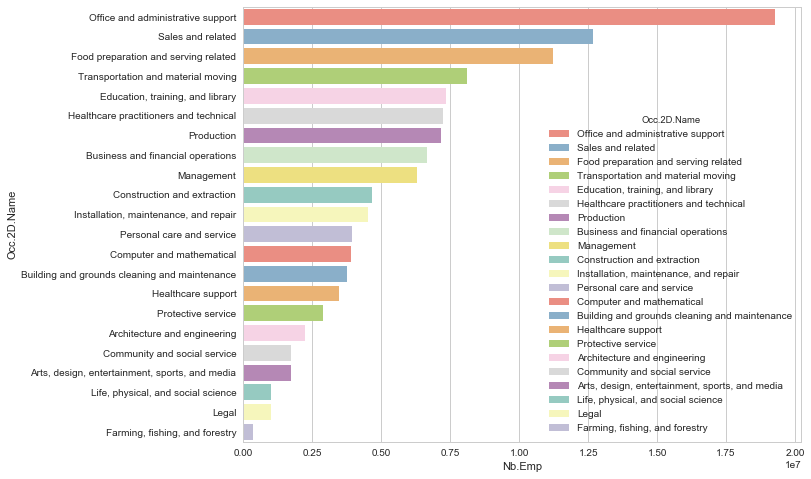

In [161]:

# US_Occ.csv there are multiple values of ISCO.1D for each Occ.3D

df = pd.read_csv('../1.Data/US_RegOcc2DYr.csv')
df = df[df['Year']==2015]
df = df[df['CBSA'].isin(set(reg[reg['Flag.CBSA.availability']==1]['CBSA']))]
df = pd.merge(df,pd.read_csv('../1.Data/US_Occ.csv')[['Occ.2D','Occ.2D.Name']].drop_duplicates())
df = df.groupby(['Occ.2D','Occ.2D.Name']).sum()[['Nb.Emp']].reset_index().sort_values(by='Nb.Emp',ascending=False)


sns.set_style("whitegrid")

palette = sns.color_palette("Set3", len(set(df['Occ.2D.Name'])))
palette_hex = palette.as_hex()
palette = palette[3:]+palette[:3]

plt.figure(figsize=(10,int(0.4*len(set(df['Occ.2D.Name'])))))

sns_plot = sns.barplot(x="Nb.Emp", y="Occ.2D.Name", data=df,hue="Occ.2D.Name",dodge=False,palette=palette)
# sns_plot.get_figure().savefig("../4.Results/SM/OccBar.pdf")